In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

/Users/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
df_players = pd.read_csv('/Users/Downloads/Players.csv')
df_stats = pd.read_csv('/Users/Downloads/Seasons_Stats.csv')
df_playerdata = pd.read_csv('/Users/Downloads/player_data.csv')

In [4]:
df_inter = df_stats.merge(df_players,how = 'left', on = 'Player')
df_inter.head()

,Unnamed: 0_x,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,TOV,PF,PTS,Unnamed: 0_y,height,weight,collage,born,birth_city,birth_state
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,NaN,217.0,458.0,0,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,NaN,99.0,279.0,1,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,NaN,192.0,438.0,2,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,NaN,29.0,63.0,3,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,NaN,27.0,59.0,3,196.0,88.0,North Carolina State University,1925.0,NaN,NaN


In [5]:
df_inter['Age']= df_inter['Year']- df_inter['born']
df_inter.head()

,Unnamed: 0_x,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,TOV,PF,PTS,Unnamed: 0_y,height,weight,collage,born,birth_city,birth_state
0,0,1950.0,Curly Armstrong,G-F,32.0,FTW,63.0,NaN,NaN,NaN,...,NaN,217.0,458.0,0,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,NaN,99.0,279.0,1,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,1950.0,Leo Barnhorst,SF,26.0,CHS,67.0,NaN,NaN,NaN,...,NaN,192.0,438.0,2,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,1950.0,Ed Bartels,F,25.0,TOT,15.0,NaN,NaN,NaN,...,NaN,29.0,63.0,3,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,1950.0,Ed Bartels,F,25.0,DNN,13.0,NaN,NaN,NaN,...,NaN,27.0,59.0,3,196.0,88.0,North Carolina State University,1925.0,NaN,NaN


In [6]:
df_inter.columns.unique()

Index(['Unnamed: 0_x', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Unnamed: 0_y', 'height',
       'weight', 'collage', 'born', 'birth_city', 'birth_state'],
      dtype='object')

** Data Visualization Career Points **
>Most career points players in NBA history

In [7]:
from IPython.core.display import display, HTML, Javascript
from string import Template
import json
import IPython.display

In [8]:
PlayerPoints = df_inter[['Player','PTS']].groupby('Player').sum().sort_values('PTS', ascending = False).head(20)

In [14]:
trace1 = go.Bar(
    x = PlayerPoints.index.tolist(),
    y = PlayerPoints["PTS"].tolist(),
    name='Career Points',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)

layout = go.Layout(
    barmode='stack',
    title = 'NBA Highest Scorers',
    titlefont=dict(size=25),
    width=850,
    height=500,
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Career Points',
        anchor = 'x',
        rangemode='tozero'
    ),
    xaxis = dict(title= 'Player Names'),
    yaxis2=dict(
        title='Value [M€]',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 20
    ),
    legend=dict(x=0.05, y=0.05)
)

fig = go.Figure(data= [trace1], layout=layout)
py.iplot(fig)

>Correlation between various factors and points scored in 2016-2017 season

In [11]:
df_2017 = df_inter[df_inter['Year'] == 2017]
df_2017.head()

,Unnamed: 0_x,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,TOV,PF,PTS,Unnamed: 0_y,height,weight,collage,born,birth_city,birth_state
24096,24096,2017.0,Alex Abrines,SG,24.0,OKC,68.0,6.0,1055.0,10.1,...,33.0,114.0,406.0,3833,198.0,86.0,NaN,1993.0,Palma de Mallorca,Spain
24097,24097,2017.0,Quincy Acy,PF,27.0,TOT,38.0,1.0,558.0,11.8,...,21.0,67.0,222.0,3531,201.0,108.0,Baylor University,1990.0,Tyler,Texas
24098,24098,2017.0,Quincy Acy,PF,27.0,DAL,6.0,0.0,48.0,-1.4,...,2.0,9.0,13.0,3531,201.0,108.0,Baylor University,1990.0,Tyler,Texas
24099,24099,2017.0,Quincy Acy,PF,27.0,BRK,32.0,1.0,510.0,13.1,...,19.0,58.0,209.0,3531,201.0,108.0,Baylor University,1990.0,Tyler,Texas
24100,24100,2017.0,Steven Adams,C,24.0,OKC,80.0,80.0,2389.0,16.5,...,146.0,195.0,905.0,3607,213.0,115.0,University of Pittsburgh,1993.0,Rotorua,New Zealand


>Plotting density distribution of key dimensions

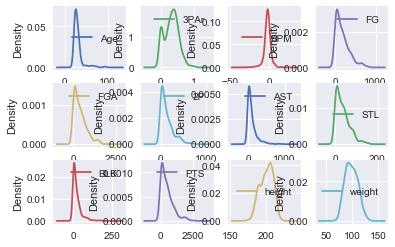

In [12]:
data = df_2017[['Age',  '3PAr',
        'BPM', 'FG', 'FGA',
       '2P', 
       'AST', 'STL', 'BLK', 'PTS', 'height',
       'weight']]

data.plot(kind='density',layout = (3,4), subplots=True, sharex=False)
plt.show()

>Correlation Matrix Plot to find high level correlations between player's age, height & weight against box score items such as BLK %, PTS etc.

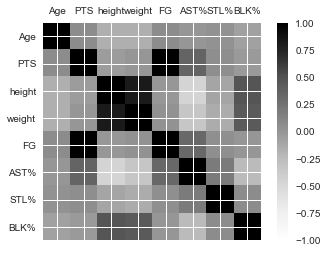

In [13]:
names = ['Age',  'PTS',  'height', 'weight', 'FG','AST%', 'STL%',
       'BLK%']

data2 = df_2017[names]

correlations = data2.corr()
# plot correlation matrix

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

**Takeaways:**
>Correlation Matrix
>>There is some negative correlation between Age & Points, it is not as significant as would have been expected given that it's a competive sport with relatively short time frame for prime age players.
Strong negative correlation between height and assist % -- Probably because they are on the receiving end of the assist.
There is some positive correlation between height & weight with block %.